# Analisis Prediktif: Prediksi Data Penumpang Kapal Titanic

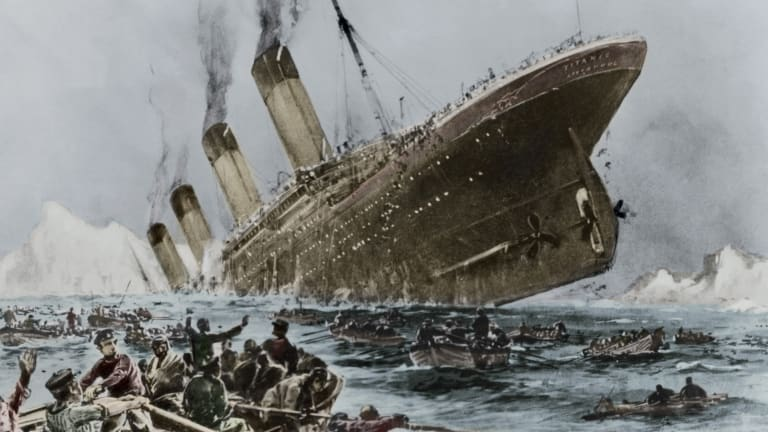

# Domain Proyek
Tenggelamnya Titanic adalah sebuah bencana kapal pesiar yang terkenal pada pelayaran perdananya. Kapal RMS Titanic yang digadang-gadang "tidak dapat tenggelam", akhirnya tenggelam di bagian utara samudera Atlantik pada tanggal 15 April 1912. Dan menewaskan 1502 dari 2224 penumpang dan awak kapal. Meskipun ada beberapa elemen keberuntungan yang terlibat untuk selamat, tampaknya beberapa kelompok orang lebih mungkin untuk selamat daripada yang lain. Analisis data tentang "orang seperti apa yang lebih mungkin untuk selamat?"  menggunakan data penumpang (yaitu nama, usia, jenis kelamin, kelas tiket, dll). Pendekatan yang dilakukan adalah dengan memanfaatkan kumpulan data umum yang tersedia dari situs web yang dikenal seperti [Kaggle](https://www.kaggle.com/c/titanic/data).

Referensi :
* http://csis.pace.edu/~ctappert/srd2014/d3.pdf
* https://www.researchgate.net/profile/Neytullah-Acun/publication/324909545_A_Comparative_Study_on_Machine_Learning_Techniques_Using_Titanic_Dataset/links/607533bc299bf1f56d51db20/A-Comparative-Study-on-Machine-Learning-Techniques-Using-Titanic-Dataset.pdf

# Business Understanding
Kumpulan data ini merekam berbagai fitur penumpang di Titanic, termasuk siapa yang selamat dan siapa yang tidak. Disadari bahwa beberapa fitur yang hilang dan tidak berkorelasi mengurangi kinerja prediksi. Untuk analisis data rinci, efek dari fitur telah diselidiki. Jadi beberapa fitur baru ditambahkan ke dataset dan beberapa fitur yang ada dihapus dari kumpulan data.

## Problem Statements (Pernyataan Masalah)
Bagaimana cara mengetahui penumpang yang akan selamat dari data yang ada?

## Goals (Tujuan)
* Mengetahui fitur yang paling berpengaruh terhadap keselamatan penumpang.
* Untuk mendapatkan hasil yang dapat mendekati prediksi dari data mentah, dengan menggunakan pembelajaran mesin dan metode rekayasa fitur.

## Solution statements (Pernyataan Solusi)
Mengetahui fitur apa saja yang berpengaruh terhadap keselamatan penumpang Titanic dan dapat memprediksi penumpang yang selamat dan tidak selamat. Maka, metodologi pada proyek ini adalah membangun model regresi dengan fitur _survived_ sebagai target. Dan, memprediksi penumpang yang dapat selamat dan tidak selamat dengan klasifikasi. Menggunakan :
1. KNN (K-Nearest Neighbor) \
Mengklasifikasikan objek baru berdasarkan atribut dan sampel-sampel dari pelatihan data.
2. Decision Tree \
Prediksi menggunakan struktur pohon atau struktur berhirarki. Lalu mengeliminasi perhitungan atau data-data yang tidak diperlukan. Sebab, sampel yang ada biasanya hanya diuji berdasarkan kriteria atau kelas tertentu saja.
3. Random Forest \
Merupakan salah satu metode dalam Decision Tree, dan kombinasi dari masing-masing tree yang diperlukan kemudian dikombinasikan ke dalam satu model. Random Forest bergantung pada sebuah nilai vector random dengan distribusi yang sama pada semua pohon yang masing-masing decision tree memiliki kedalaman yang maksimal.
4. Super Vector Machine (Classifier) \
Algoritma yang bertujuan untuk memaksimalkan margin antara pola pelatihan dan batas kepututsan, dengan sebuah bidang yang mampu memisahkan dua buah kelas.



---



# Mengimpor Library yang Dibutuhkan

In [ ]:
# pengolahan data
import pandas as pd
import numpy as np

# visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# model data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluasi model
from sklearn.metrics import confusion_matrix, classification_report, precision_score



---



# Data Loading (Memuat Data)

## Menyiapkan kredensial akun Kaggle



In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizalsihombing","key":"107dba60ac20059181a26fe88f6664f3"}'}

## Mengunduh dataset

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'Titanic'

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 20.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 57.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.87MB/s]




---



# Data Understanding (Pemahaman Data)

In [ ]:
train = pd.read_csv('/content/train.csv')
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
test = pd.read_csv('/content/test.csv')
test.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

## Keterangan kolom pada dataset

### Kamus data

* Survived (penumpang selamat) : 0 = Tidak, 1 = Ya
* Pclass (kelas tiket) : 1 = 1st, 2 = 2nd, 3 = 3rd
* SibSp : jumlah saudara kandung atau pasangan yang dibawa oleh penumpang
* Parch : jumlah keluarga atau anak yang dibawa oleh penumpang
* Ticket : nomor tiket
* Cabin : kategori kabin
* Embarked (dari pelabuhan mana penumpang naik) : \
C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Menghitung jumlah data yang kosong

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Deskripsi setiap kolom

In [ ]:
train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [ ]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

## Visualisasi data

Memvisualisasikan fitur kategorik menggunakan diagram batang, diantaranya :

* a. Pclass
* b. Sex
* c. SibSp
* d. Parch
* e. Embarked

In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

### Pclass (kelas tiket)

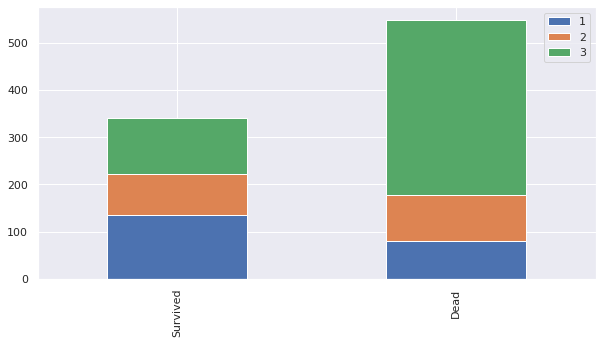

In [ ]:
bar_chart('Pclass')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang dengan kelas tiket 1, lebih mungkin untuk **selamat** dibanding dengan kelas tiket 2 maupun 3
* Penumpang dengan kelas tiket 3, lebih mungkin **tidak selamat** dibanding dengan kelas tiket 1 maupun 2

### Sex (gender)

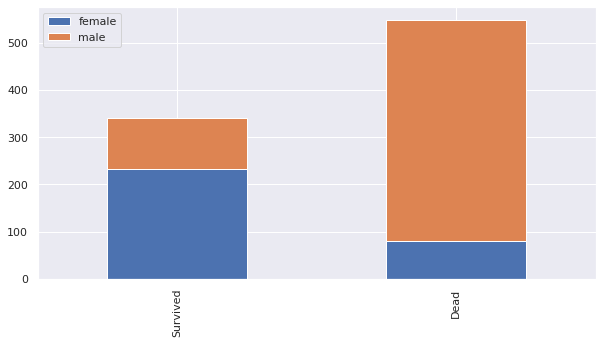

In [ ]:
bar_chart('Sex')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : \
* Penumpang **wanita** lebih mungkin selamat, dibandingkan penumpang **pria**

### SibSp (jumlah saudara atau pasangan yang dibawa oleh penumpang)

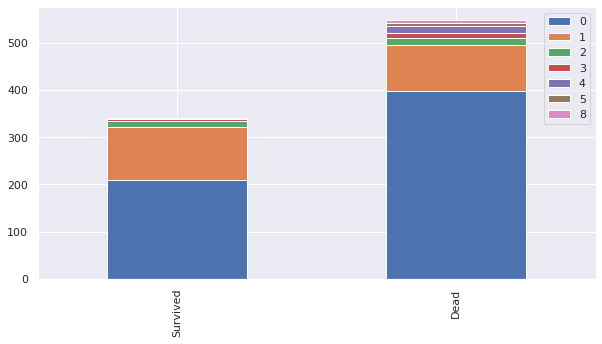

In [ ]:
bar_chart('SibSp')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang yang naik **lebih dari 2 saudara kandung atau pasangan kemungkinan selamat**
* Penumpang yang naik **tanpa saudara kandung atau pasangan lebih mungkin tidak selamat**

### Parch (jumlah keluarga atau anak yang dibawa oleh penumpang)

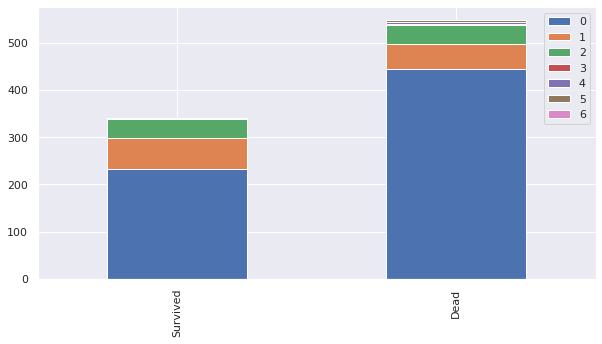

In [ ]:
bar_chart('Parch')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang yang naik dengan **lebih dari 2 anggota keluarga lebih mungkin selamat**
* Penumpang yang naik **sendirian lebih mungkin tidak selamat**

### Embarked (dari pelabuhan mana penumpang naik)

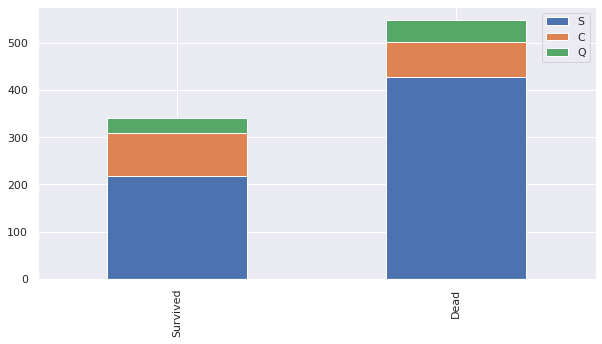

In [ ]:
bar_chart('Embarked')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang yang naik dari pelabuhan **S (Southampton) lebih mungkin tidak selamat**
* Penumpang yang naik dari pelabuhan **C (Cherbourg) sedikit lebih mungkin selamat**
* Penumpang yang naik dari pelabuhan **Q (Queenstown) lebih mungkin tidak selamat**



---



# Data Preparation (Persiapan Data)


In [ ]:
train.head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]

In [ ]:
test.head(10)

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S
5          897       3  ...   NaN        S
6          898       3  ...   NaN        Q
7          899       2  ...   NaN        S
8          900       3  ...   NaN        C
9          901       3  ...   NaN        S

[10 rows x 11 columns]

## Kolom Name

Tujuannya adalah untuk mendapatkan informasi yang lebih spesifik, contohnya "apakah penumpang Titanic seorang pria atau wanita", "apakah penumpang Titanic sudah menikah atau belum menikah". Dengan membuat sebuah kolom baru yaitu *Title*

In [ ]:
# mengkombinasikan dataset train dengan dataset test
train_test_data = [train, test]

# mengekstrak nama penumpang dengan menghilangkan namanya
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Mme           1
Countess      1
Capt          1
Sir           1
Lady          1
Don           1
Ms            1
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

Setelah nama sudah diekstrak, kemudian dilakukan pengelompokan penumpang secara numerik diantaranya :
* 0 = Mr
* 1 = Miss
* 2 = Mrs
* 3 = Lainnya

In [ ]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

Visualisasi fitur *Title*

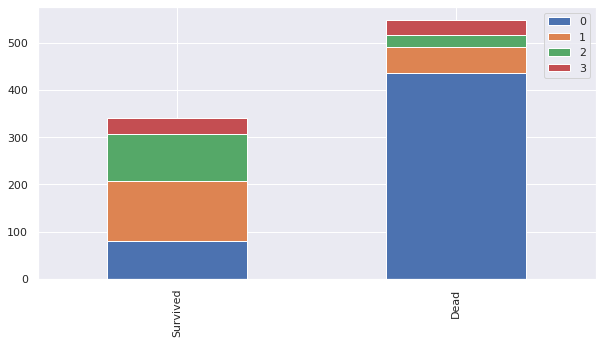

In [ ]:
bar_chart('Title')

## Kolom Sex (gender)

Tujuannya adalah untuk mengelompokkan gender secara biner, diantaranya :

*   Male = 0
*   Female = 1



In [ ]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [ ]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
test['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

Visualisasi fitur *Sex* (gender)

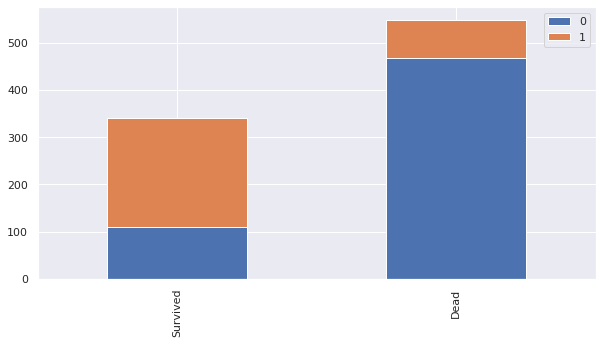

In [ ]:
bar_chart('Sex')

## Kolom Age (umur)

Pertama mengisi nilai yang kosong menggunakan rata-rata (median), lalu mengelompokkan data secara kategorik :

* child (anak-anak) : 0
* young (remaja) : 1
* adult (dewasa) : 2
* mid-age (paruh baya) : 3
* senior (lansia) : 4


In [ ]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

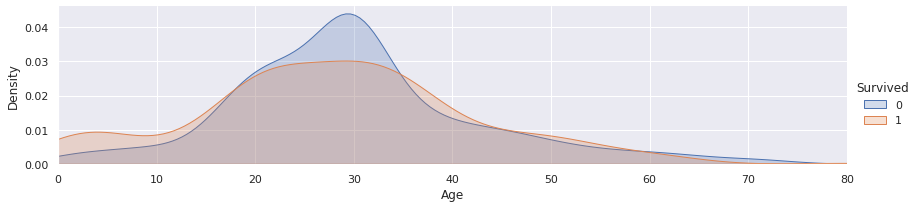

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

Visualisasi fitur *Age* (umur)

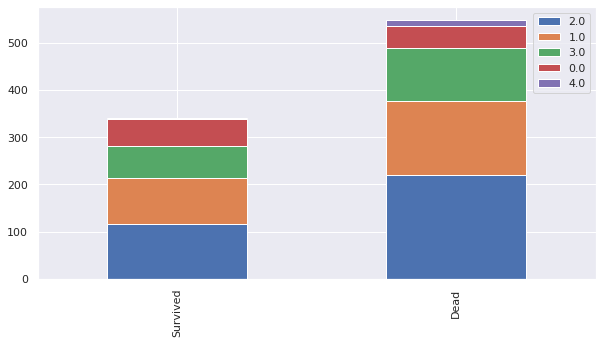

In [ ]:
bar_chart('Age')

## Kolom Embarked (dari pelabuhan mana penumpang naik)

Pertama mencari yang sering muncul (modus), lalu nilai yang kosong akan diisi dengan nilai yang sering muncul (modus) tersebut.

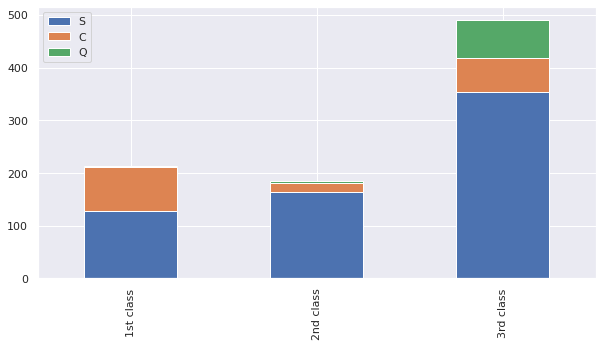

In [ ]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Dari grafik batang tersebut didapatkan bahwa lebih dari 50% dari kelas 1st, kelas 2nd, dan kelas 3rd berasal dari kota S (Southampton). \
Maka selanjutnya mengisi nilai kosong yang ada pada fitur *Embarked* dengan nilai S (Southampton)

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

Lalu mengelompokkan datanya berdasarkan kategorik secara numerik berikut :

* 0 = Southampton
* 1 = Cherbourg
* 2 = Queenstown

In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Kolom Fare (tarif)

Pertama mengisi nilai yang kosong yang ada di dalam kolom Fare menggunakan nilai tengah (median), lalu mengelompokkan data secara numerik setiap Pclass :

* 0 = kurang dari 17 Poundsterling (UK)
* 1 = lebih dari 17 Poundsterling (UK)
* 2 = lebih dari 30 Poundsterling (UK)
* 3 = lebih dari 100 Poundsterling (UK)

In [ ]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [ ]:
train.head()

PassengerId  Survived  Pclass  ... Cabin  Embarked  Title
0            1         0       3  ...   NaN         0      0
1            2         1       1  ...   C85         1      2
2            3         1       3  ...   NaN         0      1
3            4         1       1  ...  C123         0      2
4            5         0       3  ...   NaN         0      0

[5 rows x 13 columns]

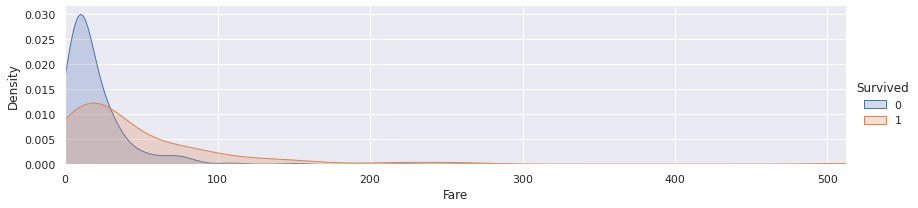

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

Visualisasi fitur *Fare* (tarif)

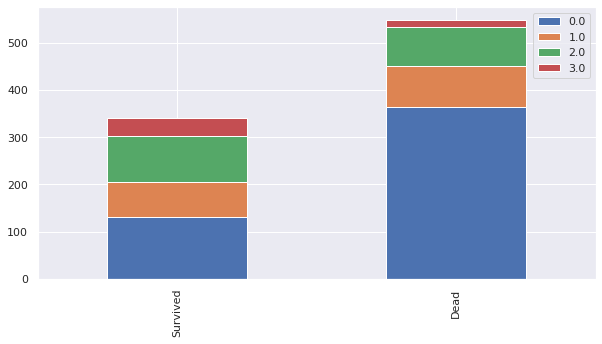

In [ ]:
bar_chart('Fare')

## Kolom Cabin (kategori cabin)

Mengelompokkan data secara skala :

* A = 0.0
* B = 0.4
* C = 0.8
* D = 1.2
* E = 1.6
* F = 2.0
* G = 2.4
* T = 2.8

In [ ]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
C22 C26        3
              ..
A32            1
D7             1
D48            1
D21            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

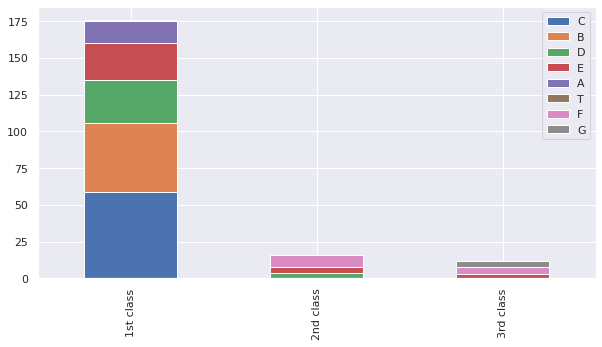

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

Lalu mengisi nilai yang kosong menggunakan nilai tengah (median)

In [ ]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## Kolom NumOfFamily (Jumlah Keluarga) gabungan dari SibSp + Parch 

Pertama menjumlahkan data penumpang SibSp (jumlah saudara kandung atau pasangan yang dibawa oleh penumpang) + Parch (jumlah keluarga atau anak yang dibawa oleh penumpang) lalu membuat fitur baru yaitu **NumOfFamily**

In [ ]:
train["NumOfFamily"] = train["SibSp"] + train["Parch"] + 1
test["NumOfFamily"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

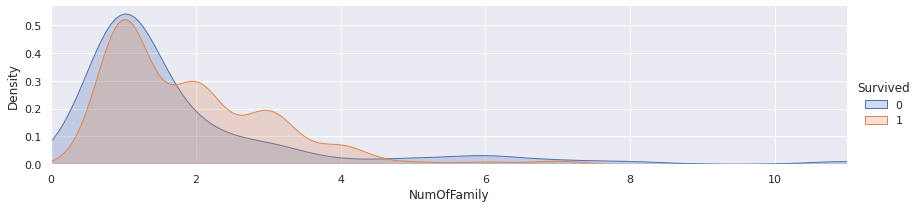

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'NumOfFamily',shade= True)
facet.set(xlim=(0, train['NumOfFamily'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['NumOfFamily'] = dataset['NumOfFamily'].map(family_mapping)

In [ ]:
train.head()

PassengerId  Survived  Pclass  ... Embarked  Title  NumOfFamily
0            1         0       3  ...        0      0          0.4
1            2         1       1  ...        1      2          0.4
2            3         1       3  ...        0      1          0.0
3            4         1       1  ...        0      2          0.4
4            5         0       3  ...        0      0          0.0

[5 rows x 14 columns]

In [ ]:
test.head()

PassengerId  Pclass  ... Title  NumOfFamily
0          892       3  ...     0          0.0
1          893       3  ...     2          0.4
2          894       2  ...     0          0.0
3          895       3  ...     0          0.0
4          896       3  ...     2          0.8

[5 rows x 13 columns]

## Membuang kolom yang tidak digunakan

In [ ]:
features_drop = ['Name', 'Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [ ]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
test_data = test

In [ ]:
train_data.shape, target.shape

((891, 8), (891,))

In [ ]:
train_data.head()

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  NumOfFamily
0       3    0  1.0   0.0    2.0         0      0          0.4
1       1    1  3.0   2.0    0.8         1      2          0.4
2       3    1  1.0   0.0    2.0         0      1          0.0
3       1    1  2.0   2.0    0.8         0      2          0.4
4       3    0  2.0   0.0    2.0         0      0          0.0

In [ ]:
test_data.shape

(418, 8)

In [ ]:
test_data.head()

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  NumOfFamily
0       3    0  2.0   0.0    2.0         2      0          0.0
1       3    1  3.0   0.0    2.0         0      2          0.4
2       2    0  3.0   0.0    2.0         2      0          0.0
3       3    0  2.0   0.0    2.0         0      0          0.0
4       3    1  1.0   0.0    2.0         0      2          0.8



---



# Modeling (Pemodelan Data)

Pertama, yaitu melakukan validasi silang menggunakan **Cross Validation (K-Fold)**, yaitu parameter untuk membagi sampel data dalam rangkaian data latih dan data uji. Dengan memisahkan kumpulan data menjadi (k) lipatan berurutan yang jumlah lipatannya 10. Kemudian akan digunakan satu kali sebagai validasi, sedangkan (k-1) lipatan yang tersisa akan membentuk dataset latih.

Parameter `shuffle=True` akan mengacak data sebelum dipecah menjadi beberapa kelompok yang mempengaruhi urutan indeks, dan mengontrol keacakan setiap lipatan.

Parameter `random_state=0` digunakan untuk menginisialisasi generator nomor acak internal, yang akan memutuskan pemisahan data menjadi data latih dan menguji indeks. Karena disini bernilai 0, maka nilai yang diinisialisasi secara acak akan dikembalikan lagi nilai yang berbeda.

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Karna disini menggunakan `cross_val_score` yaitu metode yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma, dimana data dipisahkan menjadi dua subset yaitu data proses latih dan data validasi.

Parameternya :
1. `estimator`, yaitu algoritma yang digunakan untuk pemrosesan.

2. `X`, yaitu variabel input atau fitur yang akan digunakan.

3. `y`, yaitu variabel tujuan (target) untuk mencoba memprediksi nilai.

4. `cv`, yaitu metode strategi pemisahan validasi silang.

5. `n_jobs`, yaitu jumlah pekerjaan untuk dijalankan secara paralel.

6. `scoring`, fungsi yang dipanggil pencetak skor dengan  estimator, X, y, hanya mengembalikan satu nilai.

## K-NN

Yaitu klasifikasi berbasis tetangga dengan jenis pembelajaran berbasis instansi atau pembelajaran non-generalisasi. K-NN tidak mencoba membangun model internal umum, tetapi hanya menyimpan nilai instansi dari data pelatihan. Dengan nilai tetangga (nilai terdekat) yang akan digunakan sebanyak 13.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
knn_score = cross_val_score(knn, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(knn_score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


### Skor rata-rata K-NN

In [ ]:
round(np.mean(knn_score)*100, 2)

82.6

## Decision Tree

Yaitu membuat model yang memprediksi nilai variabel target dengan mempelajari aturan keputusan sederhana yang disimpulkan dari fitur data dilihat sebagai pendekatan konstan sepotong demi sepotong.

In [ ]:
decision_tree = DecisionTreeClassifier()
scoring = 'accuracy'
decision_tree_score = cross_val_score(decision_tree, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(decision_tree_score)

[0.76666667 0.83146067 0.78651685 0.7752809  0.87640449 0.75280899
 0.83146067 0.82022472 0.74157303 0.79775281]


### Skor rata-rata Decision Tree

In [ ]:
round(np.mean(decision_tree_score)*100, 2)

79.8

## Random Forest

Yaitu meta estimator yang cocok dengan sejumlah pengklasifikasi pohon keputusan pada berbagai sub-sampel dari dataset dan menggunakan rata-rata untuk meningkatkan akurasi prediksi dan kontrol over-fitting.

Dengan jumlah nilai pohon sebanyak 13.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
random_forest_score = cross_val_score(random_forest, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(random_forest_score)

[0.76666667 0.82022472 0.80898876 0.79775281 0.86516854 0.79775281
 0.82022472 0.82022472 0.7752809  0.80898876]


### Skor rata-rata Random Forest

In [ ]:
round(np.mean(random_forest_score)*100, 2)

80.81

## Super Vector Machine (Classifier)

Yaitu pemodelan klasifikasi yang memiliki konsep lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik klasifikasi lainnya. Karena algoritma ini efektif dalam ruang dimensi tinggi walaupun jumlah dimensinya lebih besar dari jumlah sampel dan menggunakan subset titik pelatihan dalam fungsi keputusan.

In [ ]:
svc = SVC()
scoring = 'accuracy'
svc_score = cross_val_score(svc, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(svc_score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


### Skor rata-rata SVM (Classifier)

In [ ]:
round(np.mean(svc_score)*100,2)

83.5

Setelah melakukan pemodelan data dengan keempat algoritma diatas, didapatkan bahwa pemodelan menggunakan algoritma **Super Vector Machine (Classifier)** mendapatkan hasil rata-rata akurasi tertinggi yaitu = 83.5.

Model Super Vector Machine (Classifier) ini bisa dijadikan model solusi yang akan digunakan.



---



# Evaluasi

Untuk evaluasi model, disini saya menggunakan matriks **precision**. \
Sebelum ke metrik evaluasi, terlebih dahulu kita harus mengerti tentang **Confusion Matrix**.

## Confussion Matrix
Confusion matriks menggambarkan kinerja model klasifikasi pada dataset uji yang nilai sebenarnya diketahui untuk mewakili prediksi.

In [ ]:
svc.fit(train_data, target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# mendapatkan prediksinya
target_pred = svc.predict(train_data)

# menghitung confusion matrix
conf_matrix = confusion_matrix(y_true=target, y_pred=target_pred)

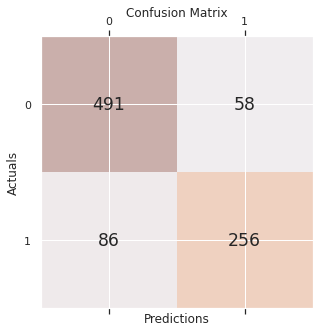

In [ ]:
# menampilkan visualisasi confusion matrix menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

* True Positive (TP): True positive mewakili nilai prediksi positif yang benar dari kasus positif aktual. Dari 314 positif aktual, 256 diprediksi positif dengan benar. **Jadi, nilai True Positive adalah 256.**

* False Positive (FP): False positive mewakili nilai prediksi positif yang salah. Nilai ini mewakili jumlah negatif (dari 342) yang diprediksi salah sebagai positif. Dari 342 negatif yang sebenarnya, 86 salah diprediksi sebagai positif. **Jadi, nilai False Positive adalah 86.**

* True Negative (TN): True negative mewakili nilai prediksi yang benar dari negatif dari kasus negatif yang sebenarnya. Dari 577 negatif aktual, 491 diprediksi negatif dengan benar. **Jadi, nilai True Negative adalah 491.**

* False Negative (FN): False negative mewakili nilai prediksi negatif yang salah. Nilai ini mewakili jumlah positif (dari 342) yang diprediksi salah sebagai negatif. Dari 342 positif aktual, 86 diprediksi salah sebagai negatif. **Jadi, nilai False Negative adalah 86**.

### Precision

Precision adalah kemampuan model untuk memprediksi nilai positif dengan benar dari semua prediksi positif yang dibuatnya, dan ukuran yang berguna dari keberhasilan prediksi ketika kelas sangat tidak seimbang. 

Formula Precision :
* TP – True Positives
* FP – False Positives
* Precision = TP/(TP + FP)

In [ ]:
# implementasi
print(classification_report(target, target_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.82      0.75      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



Precision terhadap **label 0 atau penumpang yang tidak selamat adalah 85%** dan **label 1 atau penumpang yang akan selamat adalah 82%**. Dengan pengertian bahwa **model dapat memprediksi dengan benar terhadap label 0 (penumpang yang tidak selamat) sebanyak 85%** dan **terhadap label 1 (penumpang yang akan selamat) sebanyak 82%.**


Mencoba melakukan prediksi terhadap data test

In [ ]:
prediksi = train_data.iloc[:5].copy()
prediksi

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  NumOfFamily
0       3    0  1.0   0.0    2.0         0      0          0.4
1       1    1  3.0   2.0    0.8         1      2          0.4
2       3    1  1.0   0.0    2.0         0      1          0.0
3       1    1  2.0   2.0    0.8         0      2          0.4
4       3    0  2.0   0.0    2.0         0      0          0.0

In [ ]:
evaluation_pred = {'target':target[:5]}
evaluation_pred

{'target': 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64}



---



# Penutupan
Model untuk memprediksi **penumpang Titanic selamat atau tidak**, dan **penumpang seperti apa yang dapat selamat dari tenggelamnya kapal Titanic**  telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi lagi seperti dengan mencoba penggunaan algoritma lainnya dalam membuat model seperti Random Forest, Decision Tree, Adaboost, dan masih banyak lagi.

## Referensi :
* https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide/data?scriptVersionId=1473689&select=train.csv
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://vitalflux.com/category/python/
* https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html